In [1]:
import pandas as pd
import plotly.graph_objects as go

Cálculo de la Energía de ligadura $\Delta W$

In [1]:
def Energia_ligadura(A, Z, Masa_atomica): # en MeV
    # definimos las constantes
    masa_proton = 1.007825 # masa de un protón  en uma
    masa_neutron = 1.008665 # masa de un netrón en uma
    # Fórmula de la energía de ligadura
    energia = (Z*masa_proton + (A-Z)*masa_neutron - Masa_atomica)*931.5 # energía de ligadura en uma
    # redondeamos el resultado a 6 decimales
    energia_redondeada = round(energia, 6)
    # retornamos el resultado
    return energia_redondeada


In [17]:
oxigeno16 = Energia_ligadura(16, 8, 15.994914)
2*oxigeno16

255.242178

In [18]:
azufre32 = Energia_ligadura(32, 16, 31.972071)
azufre32

271.782824

In [19]:
azufre32-2*oxigeno16

16.54064600000001

In [13]:
helio4 = Energia_ligadura(4,2, 4.002604)
8*helio4

226.361952

In [15]:
azufre32 = Energia_ligadura(32,16,31.972071)
azufre32

271.782824

In [16]:
azufre32-8*helio4

45.420872

In [21]:
Th = Energia_ligadura(234, 90, 234.043599)
Th+helio4

1805.980091

In [22]:
uranio = Energia_ligadura(238,92,238.050786)
uranio

1801.711026

In [23]:
uranio-(Th+helio4)

-4.269064999999955

In [2]:
carbono = Energia_ligadura(14,6,14.003241)
carbono

105.286514

In [3]:
oxigeno = Energia_ligadura(14, 8, 14.008596)
oxigeno

98.733411

In [27]:
resta = carbono-oxigeno
resta

6.553102500001771

In [29]:
nitrogeno15 = Energia_ligadura(15, 7, 15.000108 )
nitrogeno15

115.493890499998

In [30]:
oxigeno15 = Energia_ligadura(15,8, 15.003065)
oxigeno15

111.95698500000084

In [32]:
resta2= nitrogeno15-oxigeno15
resta2

3.536905499997161

In [33]:
sodio = Energia_ligadura(24, 11, 23.990963)
sodio

193.5256454999975

In [34]:
aluminio = Energia_ligadura(24,13, 23.999947)
aluminio

183.59212950000224

In [35]:
resta3= sodio-aluminio
resta3

9.933515999995251

aparte, no está demostrado que sean estables

In [36]:
fluor = Energia_ligadura(16,9, 16.011460)
fluor

111.42603000000109

In [37]:
nitrogeno = Energia_ligadura(16, 7, 16.006101)
nitrogeno

117.98285849999677

In [39]:
resta_fluornitrogeno= nitrogeno-fluor
resta_fluornitrogeno

6.5568284999956745

In [42]:
silicio = Energia_ligadura(27,14, 26.986704)
silicio 

219.3598664999997

In [44]:
aluminio=Energia_ligadura(27, 13, 26.981538)
aluminio

224.95445549999903

In [45]:
resta_silicio_alumio = aluminio-silicio
resta_silicio_alumio

5.594588999999331

Para graficar la energía de ligadura  $\varepsilon$ por nucleón-Superificie de energía, primero importamos los datos:

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Leer el archivo CSV
df = pd.read_csv("datos.csv")

agregamos una columna correspondiente al numero de masa

In [4]:
# Calcular la masa atómica (Z+N) y añadirla como nueva columna
df['Masa_atomica'] = df['n'] + df['z']
df

,n,z,bindingEnergy(keV),Masa_atomica
0,1,0,0.0000,1
1,1,1,1112.2831,2
2,2,1,2827.2654,3
3,3,1,1720.4491,4
4,4,1,1336.3592,5
...,...,...,...,...
3551,176,117,7095.0000,293
3552,177,117,7092.0000,294
3553,175,118,7078.0000,293
3554,176,118,7079.0000,294


Con esto primero hagamos una gráfica 2-D de la energía de ligadura por nucleón $\varepsilon$ vs Número atómico para tres elementos:

In [5]:
# Filtramos los datos para Helio (Z=2), Litio (Z=3) y Carbono (Z=6)
df_subset = df[df['z'].isin([2, 3, 6])]
df_subset

,n,z,bindingEnergy(keV),Masa_atomica
7,1,2,2572.68044,3
8,2,2,7073.91560,4
9,3,2,5512.13250,5
10,4,2,4878.51990,6
11,5,2,4123.05780,7
12,6,2,3924.52100,8
13,7,2,3349.03800,9
14,8,2,2995.13400,10
15,1,3,1153.76030,4
16,2,3,5266.13250,5


In [6]:
# Creamos un diccionario para mapear Z a símbolos de elementos
z_to_symbol = {2: 'He', 3: 'Li', 6: 'C'}

# Obtenemos los elementos únicos en df_subset
elementos = df_subset['z'].unique()
# Crear la figura
fig = go.Figure()

# Iterar sobre los elementos y agregar las curvas
for elemento in elementos:
    df_elemento = df_subset[df_subset['z'] == elemento]
    fig.add_trace(go.Scatter(x=df_elemento['Masa_atomica'], y=df_elemento['bindingEnergy(keV)'], mode='lines+markers', name=f'{z_to_symbol[elemento]}'))

# Personalizar el diseño
fig.update_layout(xaxis_title='Masa Atómica (A)', yaxis_title='$\epsilon$ (keV)', title='Energía de Ligadura vs Masa Atómica')

# Mostrar la gráfica
fig.show()

Podemos seguir el mismo procedimiento para los 10 primeros elementos de la tabla periódica:

In [7]:
# Filtrar los datos para Helio (z=1,2,...,10)
df_subset = df[df['z'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]

# Crear un diccionario para mapear Z a símbolos de elementos
z_to_symbol = {1: 'H',2: 'He', 3: 'Li', 4:'Be', 5:'B',6: 'C', 7:'N', 8:'O', 9:'F', 10:'Ne'}

# Obtener los elementos únicos en df_subset
elementos = df_subset['z'].unique()

# Crear la figura 3D con un tamaño más grande
fig = go.Figure()

# Iterar sobre los elementos y agregar las curvas
for elemento in elementos:
    df_elemento = df_subset[df_subset['z'] == elemento]
    # Agregar puntos y líneas
    fig.add_trace(go.Scatter3d(
        x=df_elemento['Masa_atomica'],
        y=df_elemento['z'],
        z=df_elemento['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'{z_to_symbol[elemento]}',
        marker=dict(
            size=6,
            color=df_elemento['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"A: {a}" for a in df_elemento['Masa_atomica']],
    ))

# Personalizar el diseño y ajustar el tamaño
fig.update_layout(
    scene=dict(
        xaxis_title='Masa Atómica (A)',
        yaxis_title='Número Atómico (Z)',
        zaxis_title='$\epsilon$ (keV)'
    ),
    title='Energía de Ligadura vs Masa Atómica y Número Atómico (Z)',
    legend=dict(title='Elemento Químico'),
    width=900,  # Ancho de la figura
    height=900  # Alto de la figura
)

# Mostrar la gráfica interactiva
fig.show()


In [8]:

# Filtrar los datos para Helio (z=1,2,...,10)
df_subset = df[df['z'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])]

# Crear un diccionario para mapear Z a símbolos de elementos
z_to_symbol = {1: 'H',2: 'He', 3: 'Li', 4:'Be', 5:'B',6: 'C', 7:'N', 8:'O', 9:'F', 10:'Ne'}

# Obtener los elementos únicos en df_subset
elementos = df_subset['z'].unique()

# Crear la figura 3D con un tamaño más grande
fig = go.Figure()

# Crear una lista para almacenar las coordenadas de masa (A) y número atómico (Z) de máxima energía de ligadura
max_energy_coordinates = []

# Iterar sobre los elementos y agregar las curvas
for elemento in elementos:
    df_elemento = df_subset[df_subset['z'] == elemento]
    # Encontrar el índice del máximo valor de energía de ligadura
    idx_max_energy = df_elemento['bindingEnergy(keV)'].idxmax()
    # Obtener las coordenadas de masa (A) y Z correspondientes al máximo
    max_A = df_elemento.loc[idx_max_energy, 'Masa_atomica']
    max_Z = df_elemento.loc[idx_max_energy, 'z']
    # Agregar las coordenadas a la lista
    max_energy_coordinates.append((max_A, max_Z))

    # Agregar puntos y líneas
    fig.add_trace(go.Scatter3d(
        x=df_elemento['Masa_atomica'],
        y=df_elemento['z'],
        z=df_elemento['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'{z_to_symbol[elemento]}',
        marker=dict(
            size=6,
            color=df_elemento['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"A: {a}" for a in df_elemento['Masa_atomica']],
    ))

# Convertir la lista en un DataFrame para visualización
df_max_energy = pd.DataFrame(max_energy_coordinates, columns=['Masa_atomica', 'z'])

# Agregar los puntos correspondientes a las coordenadas de máxima energía
fig.add_trace(go.Scatter3d(
    x=df_max_energy['Masa_atomica'],
    y=df_max_energy['z'],
    z=[0 for _ in max_energy_coordinates],  # Establecer eje z a cero para todos los puntos
    mode='lines+markers',
    name='Máxima Energía de Ligadura',
    hovertext=[f'Energía de Ligadura Máxima: {df.loc[(df["Masa_atomica"] == A) & (df["z"] == Z), "bindingEnergy(keV)"].values[0]} keV<br>Elemento: {z_to_symbol[Z]}' for A, Z in max_energy_coordinates],  # Agregar texto al pasar el mouse
    hoverinfo='text',  # Mostrar solo el texto personalizado
    marker=dict(
        size=10,
        color='red',
        symbol='circle',
        line=dict(width=2),
    ),
))

# Personalizar el diseño y ajustar el tamaño
fig.update_layout(
    scene=dict(
        xaxis_title='Masa Atómica (A)',
        yaxis_title='Número Atómico (Z)',
        zaxis_title='$\epsilon$ (keV)'
    ),
    title='Energía de Ligadura vs Masa Atómica y Número Atómico (Z)',
    legend=dict(title='Elemento Químico'),
    width=900,  # Ancho de la figura
    height=900  # Alto de la figura
)

# Mostrar la gráfica interactiva
fig.show()



ahora para los 30 primeros elementos:

In [9]:
# Filtrar los datos para Helio (z=1,2,...,10)
df_subset = df[df['z'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])]

# Crear un diccionario para mapear Z a símbolos de elementos
z_to_symbol = {
    1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne',
    11: 'Na', 12: 'Mg', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca',
    21: 'Sc', 22: 'Ti', 23: 'V', 24: 'Cr', 25: 'Mn', 26: 'Fe', 27: 'Co', 28: 'Ni', 29: 'Cu', 30: 'Zn'
}
# Obtener los elementos únicos en df_subset
elementos = df_subset['z'].unique()

# Crear la figura 3D con un tamaño más grande
fig = go.Figure()

# Crear una lista para almacenar las coordenadas de masa (A) y número atómico (Z) de máxima energía de ligadura
max_energy_coordinates = []

# Iterar sobre los elementos y agregar las curvas
for elemento in elementos:
    df_elemento = df_subset[df_subset['z'] == elemento]
    # Encontrar el índice del máximo valor de energía de ligadura
    idx_max_energy = df_elemento['bindingEnergy(keV)'].idxmax()
    # Obtener las coordenadas de masa (A) y Z correspondientes al máximo
    max_A = df_elemento.loc[idx_max_energy, 'Masa_atomica']
    max_Z = df_elemento.loc[idx_max_energy, 'z']
    # Agregar las coordenadas a la lista
    max_energy_coordinates.append((max_A, max_Z))

    # Agregar puntos y líneas
    fig.add_trace(go.Scatter3d(
        x=df_elemento['Masa_atomica'],
        y=df_elemento['z'],
        z=df_elemento['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'{z_to_symbol[elemento]}',
        marker=dict(
            size=6,
            color=df_elemento['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"A: {a}" for a in df_elemento['Masa_atomica']],
    ))

# Convertir la lista en un DataFrame para visualización
df_max_energy = pd.DataFrame(max_energy_coordinates, columns=['Masa_atomica', 'z'])

# Agregar los puntos correspondientes a las coordenadas de máxima energía
fig.add_trace(go.Scatter3d(
    x=df_max_energy['Masa_atomica'],
    y=df_max_energy['z'],
    z=[0 for _ in max_energy_coordinates],  # Establecer eje z a cero para todos los puntos
    mode='lines+markers',
    name='Máxima Energía de Ligadura',
    hovertext=[f'Energía de Ligadura Máxima: {df.loc[(df["Masa_atomica"] == A) & (df["z"] == Z), "bindingEnergy(keV)"].values[0]} keV<br>Elemento: {z_to_symbol[Z]}' for A, Z in max_energy_coordinates],  # Agregar texto al pasar el mouse
    hoverinfo='text',  # Mostrar solo el texto personalizado
    marker=dict(
        size=10,
        color='red',
        symbol='circle',
        line=dict(width=2),
    ),
))

# Personalizar el diseño y ajustar el tamaño
fig.update_layout(
    scene=dict(
        xaxis_title='Masa Atómica (A)',
        yaxis_title='Número Atómico (Z)',
        zaxis_title='$\epsilon$ (keV)'
    ),
    title='Energía de Ligadura vs Masa Atómica y Número Atómico (Z)',
    legend=dict(title='Elemento Químico'),
    width=1200,  # Ancho de la figura
    height=900  # Alto de la figura
)

# Mostrar la gráfica interactiva
fig.show()

In [10]:
# Filtrar los datos para los 100 primeros elementos
df_subset = df[df['z'].isin(range(1, 101))]

# Crear un diccionario para mapear Z a símbolos de elementos
z_to_symbol = {
    1: 'H', 2: 'He', 3: 'Li', 4: 'Be', 5: 'B', 6: 'C', 7: 'N', 8: 'O', 9: 'F', 10: 'Ne',
    11: 'Na', 12: 'Mg', 13: 'Al', 14: 'Si', 15: 'P', 16: 'S', 17: 'Cl', 18: 'Ar', 19: 'K', 20: 'Ca',
    21: 'Sc', 22: 'Ti', 23: 'V', 24: 'Cr', 25: 'Mn', 26: 'Fe', 27: 'Co', 28: 'Ni', 29: 'Cu', 30: 'Zn',
    31: 'Ga', 32: 'Ge', 33: 'As', 34: 'Se', 35: 'Br', 36: 'Kr', 37: 'Rb', 38: 'Sr', 39: 'Y', 40: 'Zr',
    41: 'Nb', 42: 'Mo', 43: 'Tc', 44: 'Ru', 45: 'Rh', 46: 'Pd', 47: 'Ag', 48: 'Cd', 49: 'In', 50: 'Sn',
    51: 'Sb', 52: 'Te', 53: 'I', 54: 'Xe', 55: 'Cs', 56: 'Ba', 57: 'La', 58: 'Ce', 59: 'Pr', 60: 'Nd',
    61: 'Pm', 62: 'Sm', 63: 'Eu', 64: 'Gd', 65: 'Tb', 66: 'Dy', 67: 'Ho', 68: 'Er', 69: 'Tm', 70: 'Yb',
    71: 'Lu', 72: 'Hf', 73: 'Ta', 74: 'W', 75: 'Re', 76: 'Os', 77: 'Ir', 78: 'Pt', 79: 'Au', 80: 'Hg',
    81: 'Tl', 82: 'Pb', 83: 'Bi', 84: 'Po', 85: 'At', 86: 'Rn', 87: 'Fr', 88: 'Ra', 89: 'Ac', 90: 'Th',
    91: 'Pa', 92: 'U', 93: 'Np', 94: 'Pu', 95: 'Am', 96: 'Cm', 97: 'Bk', 98: 'Cf', 99: 'Es', 100: 'Fm'
}
# Obtener los elementos únicos en df_subset
elementos = df_subset['z'].unique()

# Crear la figura 3D con un tamaño más grande
fig = go.Figure()

# Crear una lista para almacenar las coordenadas de masa (A) y número atómico (Z) de máxima energía de ligadura
max_energy_coordinates = []

# Iterar sobre los elementos y agregar las curvas
for elemento in elementos:
    df_elemento = df_subset[df_subset['z'] == elemento]
    # Encontrar el índice del máximo valor de energía de ligadura
    idx_max_energy = df_elemento['bindingEnergy(keV)'].idxmax()
    # Obtener las coordenadas de masa (A) y Z correspondientes al máximo
    max_A = df_elemento.loc[idx_max_energy, 'Masa_atomica']
    max_Z = df_elemento.loc[idx_max_energy, 'z']
    # Agregar las coordenadas a la lista
    max_energy_coordinates.append((max_A, max_Z))

    # Agregar puntos y líneas
    fig.add_trace(go.Scatter3d(
        x=df_elemento['Masa_atomica'],
        y=df_elemento['z'],
        z=df_elemento['bindingEnergy(keV)'],
        mode='lines+markers',
        name=f'{z_to_symbol[elemento]}',
        marker=dict(
            size=6,
            color=df_elemento['bindingEnergy(keV)'],
            colorscale='Viridis',
            opacity=0.8
        ),
        line=dict(width=2),
        text=[f"A: {a}" for a in df_elemento['Masa_atomica']],
    ))

# Convertir la lista en un DataFrame para visualización
df_max_energy = pd.DataFrame(max_energy_coordinates, columns=['Masa_atomica', 'z'])

# Agregar los puntos correspondientes a las coordenadas de máxima energía
fig.add_trace(go.Scatter3d(
    x=df_max_energy['Masa_atomica'],
    y=df_max_energy['z'],
    z=[0 for _ in max_energy_coordinates],  # Establecer eje z a cero para todos los puntos
    mode='lines+markers',
    name='Máxima Energía de Ligadura',
    hovertext=[f'Energía de Ligadura Máxima: {df.loc[(df["Masa_atomica"] == A) & (df["z"] == Z), "bindingEnergy(keV)"].values[0]} keV<br>Elemento: {z_to_symbol[Z]}' for A, Z in max_energy_coordinates],  # Agregar texto al pasar el mouse
    hoverinfo='text',  # Mostrar solo el texto personalizado
    marker=dict(
        size=6,
        color='red',
        symbol='circle',
        line=dict(width=2),
    ),
))

# Personalizar el diseño y ajustar el tamaño
fig.update_layout(
    scene=dict(
        xaxis_title='Masa Atómica (A)',
        yaxis_title='Número Atómico (Z)',
        zaxis_title='$\epsilon$ (keV)'
    ),
    title='Energía de Ligadura vs Masa Atómica y Número Atómico (Z)',
    legend=dict(title='Elemento Químico'),
    width=1200,  # Ancho de la figura
    height=900  # Alto de la figura
)

# Mostrar la gráfica interactiva
fig.show() 

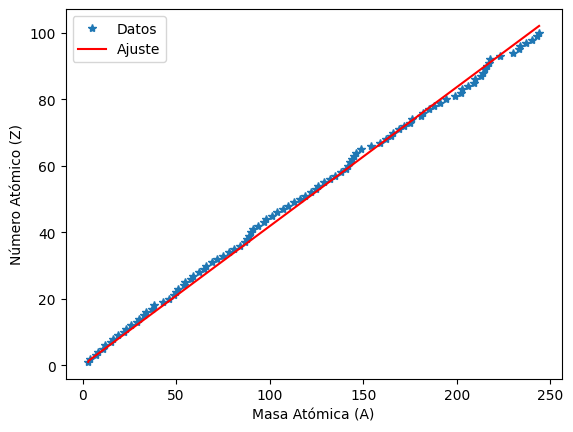

Coeficientes del ajuste: a = 2.390123142980493, b = 3037736612387.218, c = -26.61617408429338


In [11]:
import numpy as np
from scipy.optimize import curve_fit
Z_estable = df_max_energy['z'].astype(float).tolist()
Masa_estable = df_max_energy['Masa_atomica'].astype(float).tolist()
Z_estable = np.array(Z_estable)
Masa_estable = np.array(Masa_estable)
# Definir la función del modelo
def modelo(A, a, b, c):
    return A / (a+ b * (A**(c)))

# Realizar el ajuste
params, covariance = curve_fit(modelo, Masa_estable, Z_estable)

# Obtener los parámetros del ajuste
a, b, c = params

# Obtener el valor de A para tu función
A_fit = np.linspace(min(Masa_estable), max(Masa_estable), 1000)

# Calcular el valor de Z usando el modelo ajustado
Z_fit = modelo(A_fit, a, b,c)

# Graficar los datos y el ajuste
plt.plot(Masa_estable, Z_estable, '*', label='Datos')
plt.plot(A_fit, Z_fit, label='Ajuste', color='red')
plt.xlabel('Masa Atómica (A)')
plt.ylabel('Número Atómico (Z)')
plt.legend()
plt.show()

# Imprimir los coeficientes del ajuste
print(f'Coeficientes del ajuste: a = {a}, b = {b}, c = {c}')
